In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


This is for linear regression

In [2]:
df = pd.read_csv("/Users/alexcurry/Downloads/DS_tut_data/DATA/Advertising.csv")
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [3]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [4]:
df['total_spend'] = df['TV'] + df['radio'] +df['newspaper']

In [5]:
df.head()

,TV,radio,newspaper,sales,total_spend
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0


<Axes: xlabel='total_spend', ylabel='sales'>

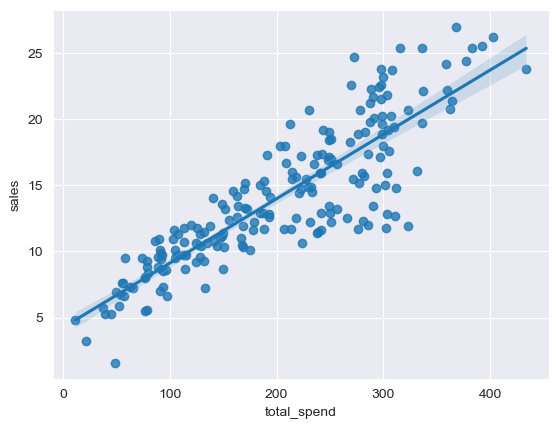

In [6]:
sns.regplot(data=df, x='total_spend', y='sales')

In [7]:
X = df['total_spend']
y = df['sales']

In [8]:
np.polyfit(X,y,deg=1)

array([0.04868788, 4.24302822])

In [9]:
potential_spend = np.linspace(0,500,100)

In [10]:
predicted_sales = 0.0486788*potential_spend + 4.243

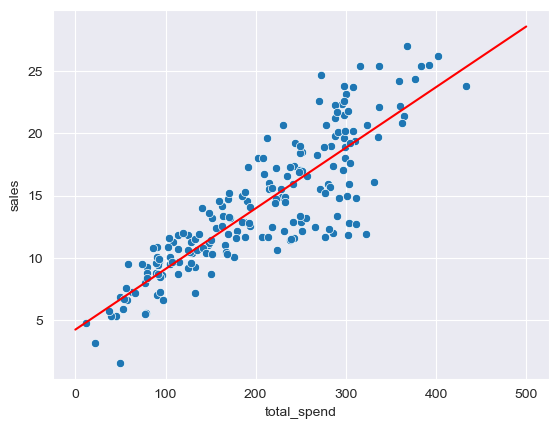

In [11]:
sns.scatterplot(x='total_spend', y= 'sales', data=df)
plt.plot(potential_spend,predicted_sales,color='red')

In [12]:
spend = 200
predicted_sales = 0.0486788*spend + 4.243

In [13]:
predicted_sales

13.978760000000001

In [14]:
np.polyfit(X,y,3)

array([ 3.07615033e-07, -1.89392449e-04,  8.20886302e-02,  2.70495053e+00])

In [15]:
pot_spend = np.linspace(0,500,100)

In [16]:
pred_sales = 3.076e-07*pot_spend**3 + -1.893e-04*pot_spend**2 + 8.208e-02*pot_spend + 2.704

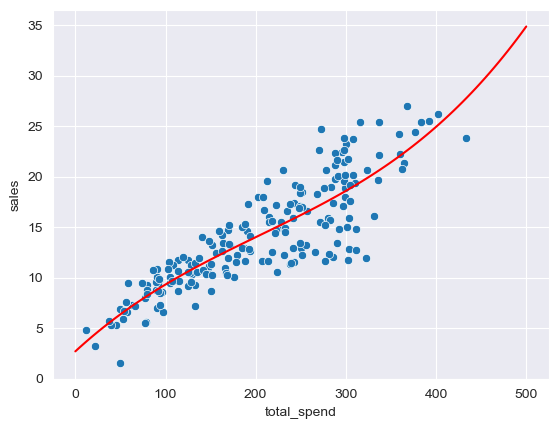

In [17]:
sns.scatterplot(x='total_spend', y= 'sales', data=df)
plt.plot(pot_spend,pred_sales,color='red')

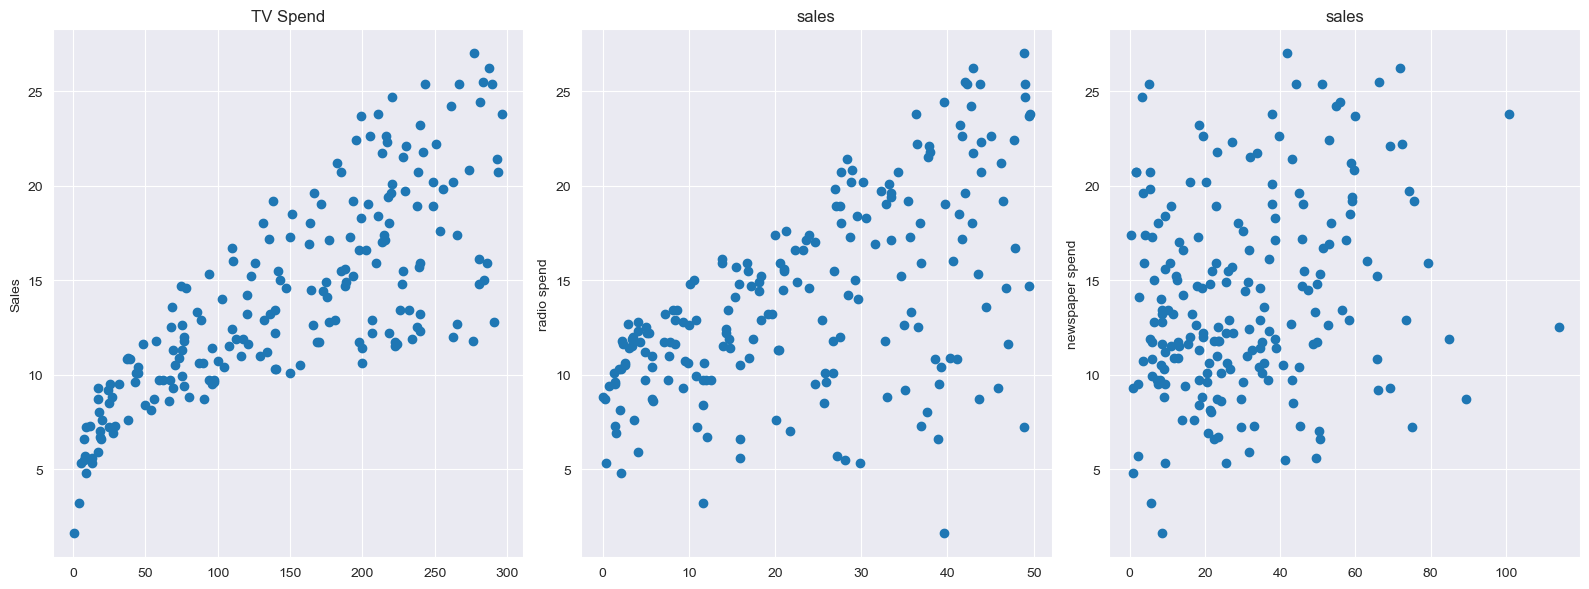

In [18]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,6))

axes[0].plot(df['TV'], df['sales'], 'o')
axes[0].set_ylabel("Sales")
axes[0].set_title('TV Spend')

axes[1].plot(df['radio'], df['sales'], 'o')
axes[1].set_ylabel("radio spend")
axes[1].set_title('sales')

axes[2].plot(df['newspaper'], df['sales'], 'o')
axes[2].set_ylabel("newspaper spend")
axes[2].set_title("sales")
plt.tight_layout();

/Users/alexcurry/anaconda3/envs/Test/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


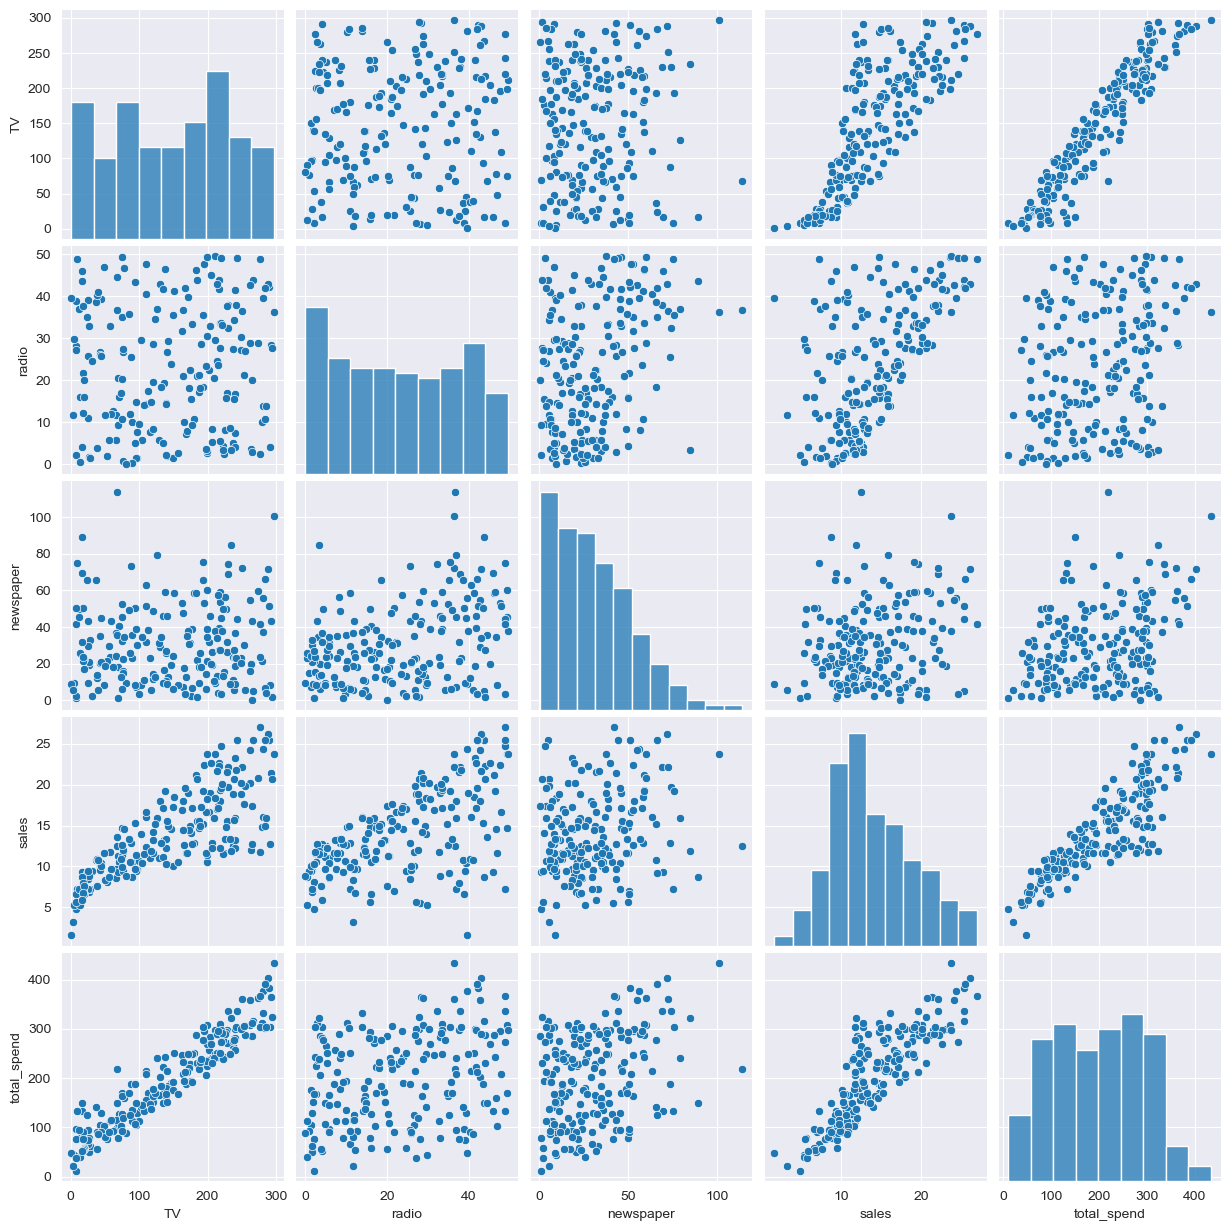

In [19]:
sns.pairplot(df)

In [20]:
df = df.drop('total_spend', axis=1)

In [21]:
X = df.drop('sales', axis=1)

In [22]:
y = df['sales']

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
help(LinearRegression)

Help on class LinearRegression in module sklearn.linear_model._base:

class LinearRegression(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, LinearModel)
 |  LinearRegression(*, fit_intercept=True, copy_X=True, n_jobs=None, positive=False)
 |  
 |  Ordinary least squares Linear Regression.
 |  
 |  LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
 |  to minimize the residual sum of squares between the observed targets in
 |  the dataset, and the targets predicted by the linear approximation.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : bool, default=True
 |      Whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (i.e. data is expected to be centered).
 |  
 |  copy_X : bool, default=True
 |      If True, X will be copied; else, it may be overwritten.
 |  
 |  n_jobs : int, default=None
 |      The number of jobs to use for the computation. This will only provide
 |  

In [27]:
model = LinearRegression()

In [28]:
model.fit(X_train, y_train)

LinearRegression()

In [29]:
test_predictions = model.predict(X_test)

In [30]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,mean_absolute_percentage_error,r2_score

<Axes: xlabel='sales', ylabel='Count'>

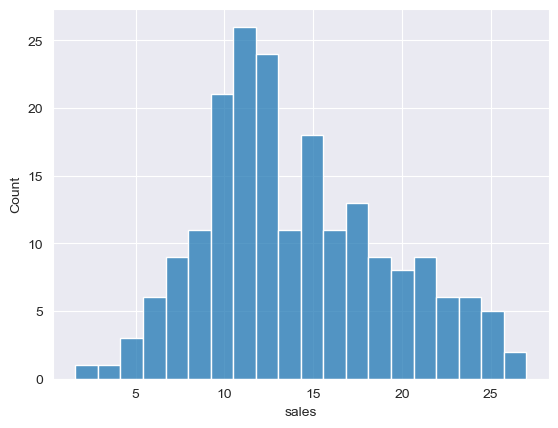

In [31]:
sns.histplot(data=df,x='sales', bins=20)

In [32]:
mean_absolute_error(y_test, test_predictions)

1.2137457736144803

In [33]:
mean_absolute_percentage_error(y_test, test_predictions)

0.11831359130546636

In [34]:
#RMSE
np.sqrt(mean_squared_error(y_test, test_predictions))

1.5161519375993882

In [35]:
r2_score(y_test, test_predictions)

0.9185780903322445

In [36]:
test_residuals = y_test - test_predictions

In [37]:
test_residuals

37    -1.041313
109    0.189374
31     0.451111
89    -0.308198
66     0.327143
119   -0.412483
54    -0.089925
74    -0.299540
145    0.524155
142    0.878058
148   -1.505032
112    0.207650
174   -2.225411
55     2.412060
141    0.775434
149    0.118016
25    -3.552290
34     1.810863
170    0.843850
39     1.096888
172   -0.192152
153    0.757859
175    2.313681
61     1.378009
65     1.320379
50    -1.252073
42    -0.769259
129    1.647714
179    0.176840
2     -3.207197
12    -1.577578
133    0.355399
90     1.129731
22    -1.107800
41    -0.214921
32     1.832357
125    1.346067
196    1.421653
158   -3.281056
180   -0.135911
16    -0.510026
186    0.528079
144    1.185301
121   -1.045720
80     0.232893
18     1.216320
78    -3.698066
48    -1.453889
4     -0.339423
15     1.585066
1     -2.097274
43    -1.066159
102   -2.762851
164    0.754630
9     -1.962615
155   -2.308703
36     2.105349
190   -1.824097
33    -1.374000
45    -0.287857
Name: sales, dtype: float64

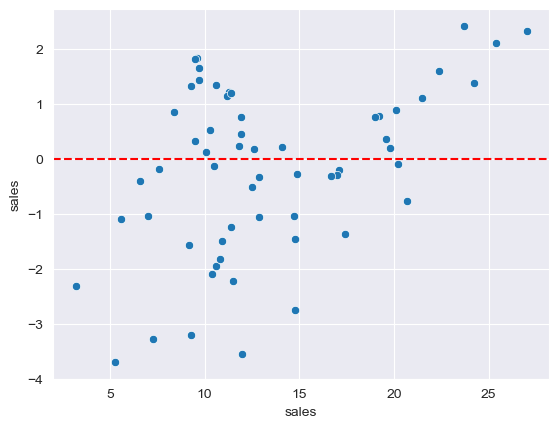

In [38]:
sns.scatterplot(x=y, y=test_residuals)
plt.axhline(y=0, color='red', linestyle='--')

/Users/alexcurry/anaconda3/envs/Test/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


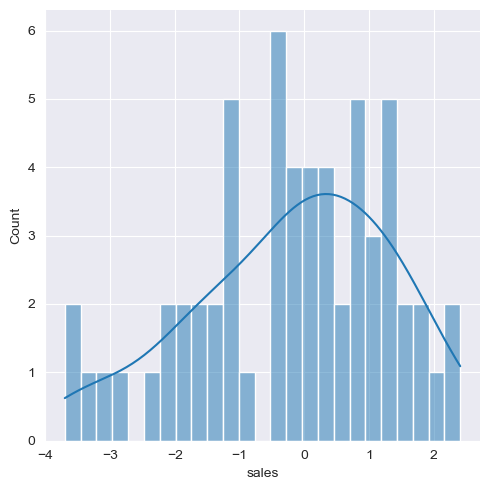

In [39]:
sns.displot(test_residuals,bins=25,kde=True)

In [40]:
import scipy as sp

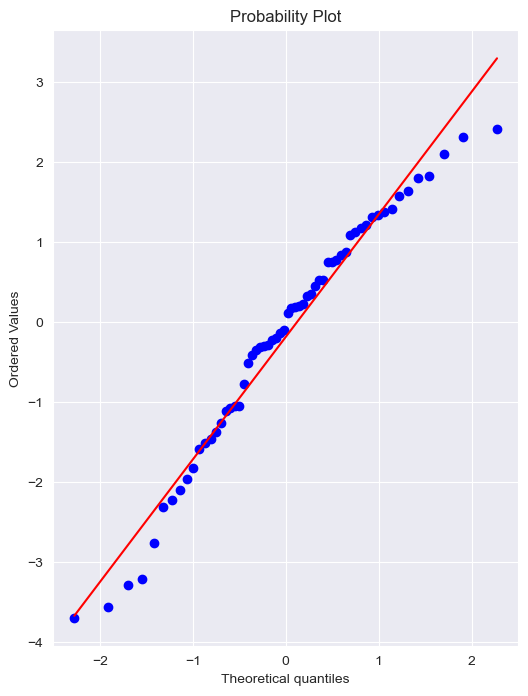

In [41]:
fig, ax = plt.subplots(figsize=(6,8), dpi=100)
_ = sp.stats.probplot(test_residuals,plot=ax)

In [42]:
final_model = LinearRegression()

In [43]:
final_model.fit(X,y) 

LinearRegression()

In [44]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [45]:
X.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [46]:
y_hat = final_model.predict(X)

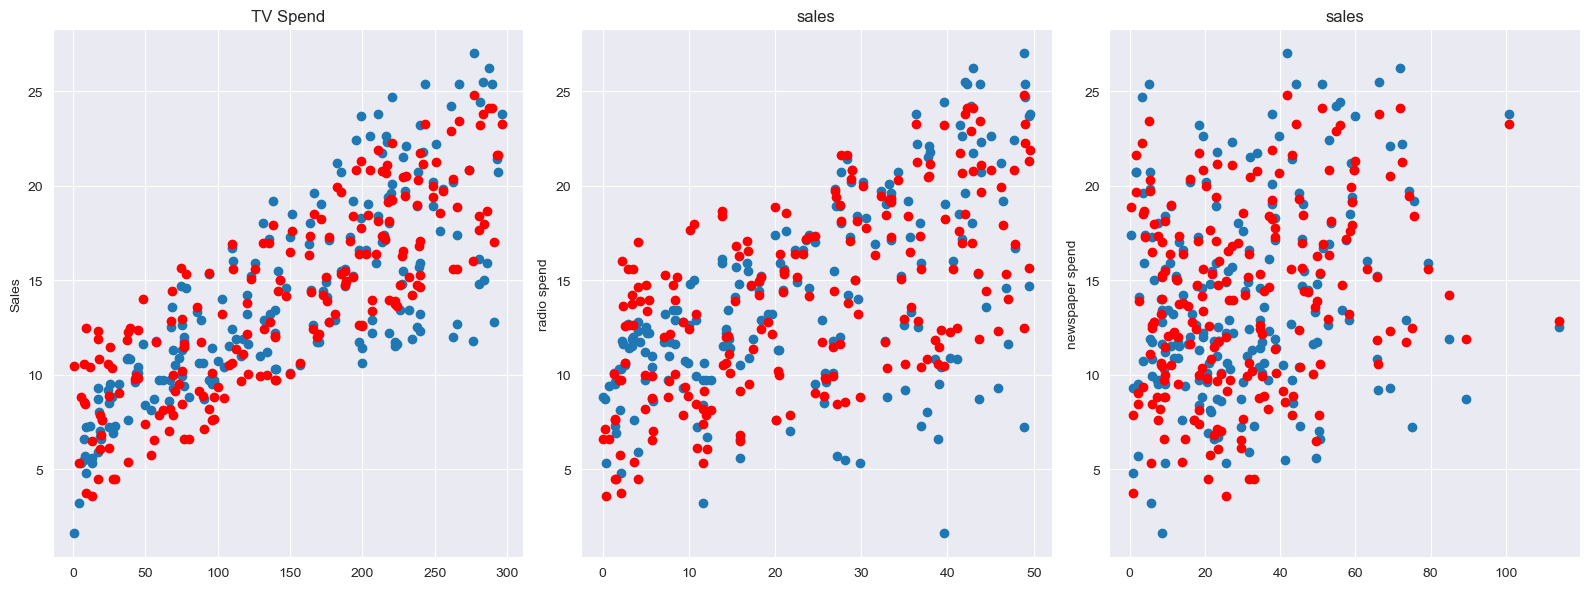

In [47]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,6))

axes[0].plot(df['TV'], df['sales'], 'o')
axes[0].plot(df['TV'], y_hat,'o', color='red')
axes[0].set_ylabel("Sales")
axes[0].set_title('TV Spend')

axes[1].plot(df['radio'], df['sales'], 'o')
axes[1].plot(df['radio'], y_hat, 'o',color='red')
axes[1].set_ylabel("radio spend")
axes[1].set_title('sales')

axes[2].plot(df['newspaper'], df['sales'], 'o')
axes[2].plot(df['newspaper'], y_hat,'o', color='red')
axes[2].set_ylabel("newspaper spend")
axes[2].set_title("sales")
plt.tight_layout();

In [48]:
#Saving and loading the model
from joblib import dump,load

In [49]:
dump(final_model, 'final_sales_model.joblib')

['final_sales_model.joblib']

In [50]:
loaded_model = load('final_sales_model.joblib')

In [51]:
loaded_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [52]:
X.shape

(200, 3)

In [53]:
campaign = [[149,22,12]]

In [54]:
loaded_model.predict(campaign)

/Users/alexcurry/anaconda3/envs/Test/lib/python3.8/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([13.893032])

In [55]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [56]:
X = df.drop(columns=['sales'])

In [57]:
y = df['sales']

In [58]:
from sklearn.preprocessing import PolynomialFeatures

In [59]:
polynomial_converter = PolynomialFeatures(degree=2, include_bias=False)

In [60]:
polynomial_converter.fit(X)

PolynomialFeatures(include_bias=False)

In [61]:
poly_features = polynomial_converter.transform(X)

In [62]:
poly_features.shape

(200, 9)

In [63]:
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [64]:
polynomial_converter.fit_transform(X)

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]])

In [65]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

In [66]:
model = LinearRegression()

In [67]:
model.fit(X_train, y_train)

LinearRegression()

In [68]:
test_predictions = model.predict(X_test)

In [69]:
MAE = mean_absolute_error(y_test, test_predictions)
MAE

0.4896798044803488

In [70]:
MSE = mean_squared_error(y_test, test_predictions)
MSE

0.4417505510403312

In [71]:
RMSE = np.sqrt(MSE)
RMSE

0.6646431757268942

In [72]:
model.coef_

array([ 5.17095811e-02,  1.30848864e-02,  1.20000085e-02, -1.10892474e-04,
        1.14212673e-03, -5.24100082e-05,  3.34919737e-05,  1.46380310e-04,
       -3.04715806e-05])

In [73]:
# create the different order poly
# split poly feat train/test
# fit on train 
# store/save the rmse for both the train and test
#Plot the results (error v poly order)

In [74]:
train_rmse_errors = []
test_rmse_errors = []

for d in range(1,10):
    
    poly_converter = PolynomialFeatures(degree=d, include_bias=False)
    poly_features = polynomial_converter.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)
    
    train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
    test_rmse = np.sqrt(mean_squared_error(y_test,test_predictions))
    
    train_rmse_errors.append(train_rmse)
    test_rmse_errors.append(test_rmse)
    

In [75]:
train_rmse_errors

[0.5879574085292232,
 0.5879574085292232,
 0.5879574085292232,
 0.5879574085292232,
 0.5879574085292232,
 0.5879574085292232,
 0.5879574085292232,
 0.5879574085292232,
 0.5879574085292232]

In [76]:
test_rmse_errors

[0.6646431757268942,
 0.6646431757268942,
 0.6646431757268942,
 0.6646431757268942,
 0.6646431757268942,
 0.6646431757268942,
 0.6646431757268942,
 0.6646431757268942,
 0.6646431757268942]

In [77]:
final_poly_converter = PolynomialFeatures(degree=3, include_bias=False)

In [78]:
final_model = LinearRegression()

In [79]:
full_converted_X = final_poly_converter.fit_transform(X)
final_model.fit(full_converted_X,y)

LinearRegression()

In [80]:
#To save use joblib as above. 

Regularization data setup

In [81]:
df = pd.read_csv("/Users/alexcurry/Downloads/DS_tut_data/DATA/Advertising.csv")
df.head()
X = df.drop("sales", axis=1)
y = df['sales']

In [82]:
polynomial_converter = PolynomialFeatures(degree=3, include_bias=False)

In [83]:
poly_features = polynomial_converter.fit_transform(X)

In [84]:
poly_features.shape

(200, 19)

In [85]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

In [86]:
X_train.shape

(140, 19)

In [87]:
from sklearn.preprocessing import StandardScaler

In [88]:
scaler = StandardScaler()

In [89]:
scaler.fit(X_train)

StandardScaler()

In [90]:
X_train = scaler.transform(X_train)

In [91]:
X_test = scaler.transform(X_test)

In [92]:
X_train

array([[ 0.49300171, -0.33994238,  1.61586707, ..., -0.16360242,
         0.54694754,  1.37075536],
       [ 1.61337153,  1.32852213,  1.90079242, ...,  2.63236858,
         2.6297449 ,  1.95593378],
       [-0.84811893, -1.58789957, -1.02319564, ..., -0.72634944,
        -0.61593941, -0.54133745],
       ...,
       [ 1.04606563, -1.30982215,  0.27064572, ..., -0.71065643,
        -0.53420112, -0.20690952],
       [ 0.74817069,  0.03987068, -1.26608283, ..., -0.66805936,
        -0.61031703, -0.54616941],
       [ 0.13813882,  0.55533126,  1.01799092, ...,  0.61006767,
         0.67881488,  0.45425942]])

In [93]:
from sklearn.linear_model import Ridge

In [94]:
help(Ridge)

Help on class Ridge in module sklearn.linear_model._ridge:

class Ridge(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, _BaseRidge)
 |  Ridge(alpha=1.0, *, fit_intercept=True, copy_X=True, max_iter=None, tol=0.0001, solver='auto', positive=False, random_state=None)
 |  
 |  Linear least squares with l2 regularization.
 |  
 |  Minimizes the objective function::
 |  
 |  ||y - Xw||^2_2 + alpha * ||w||^2_2
 |  
 |  This model solves a regression model where the loss function is
 |  the linear least squares function and regularization is given by
 |  the l2-norm. Also known as Ridge Regression or Tikhonov regularization.
 |  This estimator has built-in support for multi-variate regression
 |  (i.e., when y is a 2d-array of shape (n_samples, n_targets)).
 |  
 |  Read more in the :ref:`User Guide <ridge_regression>`.
 |  
 |  Parameters
 |  ----------
 |  alpha : {float, ndarray of shape (n_targets,)}, default=1.0
 |      Constant that multiplies the L2 term, controlling regula

In [95]:
ridge_model = Ridge(alpha=10)

In [96]:
ridge_model.fit(X_train, y_train)

Ridge(alpha=10)

In [97]:
test_predictions = ridge_model.predict(X_test)

In [98]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [99]:
MAE = mean_absolute_error(y_test, test_predictions)

In [100]:
MAE

0.5774404204714183

In [101]:
RMSE = np.sqrt(mean_squared_error(y_test, test_predictions))

In [102]:
RMSE

0.8946386461319674

In [103]:
from sklearn.linear_model import RidgeCV

In [104]:
ridge_cv_model = RidgeCV(alphas=[0.1,1.0,10.0],scoring='neg_mean_squared_error')

In [105]:
ridge_cv_model.fit(X_train, y_train)

RidgeCV(alphas=[0.1, 1.0, 10.0], scoring='neg_mean_squared_error')

In [106]:
ridge_cv_model.alpha_

0.1

In [107]:
from sklearn.metrics import get_scorer_names

In [108]:
get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',

In [109]:
test_predictions = ridge_cv_model.predict(X_test)

In [110]:
MAE = mean_absolute_error(y_test, test_predictions)

In [111]:
RMSE = np.sqrt(mean_squared_error(y_test, test_predictions))

In [112]:
MAE

0.42737748842963297

In [113]:
RMSE

0.6180719926925345

In [114]:
r2_score(y_test, test_predictions)

0.9864688732449138

In [115]:
ridge_cv_model.coef_

array([ 5.40769392,  0.5885865 ,  0.40390395, -6.18263924,  4.59607939,
       -1.18789654, -1.15200458,  0.57837796, -0.1261586 ,  2.5569777 ,
       -1.38900471,  0.86059434,  0.72219553, -0.26129256,  0.17870787,
        0.44353612, -0.21362436, -0.04622473, -0.06441449])

Lasso Regression - Least absolute shrinkage and selection operator

In [116]:
from sklearn.linear_model import LassoCV

In [117]:
help(LassoCV)

Help on class LassoCV in module sklearn.linear_model._coordinate_descent:

class LassoCV(sklearn.base.RegressorMixin, LinearModelCV)
 |  LassoCV(*, eps=0.001, n_alphas=100, alphas=None, fit_intercept=True, precompute='auto', max_iter=1000, tol=0.0001, copy_X=True, cv=None, verbose=False, n_jobs=None, positive=False, random_state=None, selection='cyclic')
 |  
 |  Lasso linear model with iterative fitting along a regularization path.
 |  
 |  See glossary entry for :term:`cross-validation estimator`.
 |  
 |  The best model is selected by cross-validation.
 |  
 |  The optimization objective for Lasso is::
 |  
 |      (1 / (2 * n_samples)) * ||y - Xw||^2_2 + alpha * ||w||_1
 |  
 |  Read more in the :ref:`User Guide <lasso>`.
 |  
 |  Parameters
 |  ----------
 |  eps : float, default=1e-3
 |      Length of the path. ``eps=1e-3`` means that
 |      ``alpha_min / alpha_max = 1e-3``.
 |  
 |  n_alphas : int, default=100
 |      Number of alphas along the regularization path.
 |  
 |  alp

In [118]:
lasso_cv_model = LassoCV(eps=0.001,n_alphas=100,cv=5,max_iter=1000000)

In [119]:
lasso_cv_model.fit(X_train, y_train)

LassoCV(cv=5, max_iter=1000000)

In [120]:
lasso_cv_model.alpha_

0.004943070909225827

In [121]:
test_predictions = lasso_cv_model.predict(X_test)

In [122]:
MAE = mean_absolute_error(y_test, test_predictions)

In [123]:
RMSE = np.sqrt(mean_squared_error(y_test, test_predictions))

In [124]:
MAE

0.4335034618590066

In [125]:
RMSE

0.6063140748984026

In [126]:
lasso_cv_model.coef_

array([ 4.86023329,  0.12544598,  0.20746872, -4.99250395,  4.38026519,
       -0.22977201, -0.        ,  0.07267717, -0.        ,  1.77780246,
       -0.69614918, -0.        ,  0.12044132, -0.        , -0.        ,
       -0.        ,  0.        ,  0.        , -0.        ])

In [127]:
r2_score(y_test, test_predictions)

0.9869787962811952

Elastic net

In [128]:
from sklearn.linear_model import ElasticNetCV

In [129]:
elastic_net_model = ElasticNetCV(l1_ratio=[.1,.5,.7,.9,.95,.99,1], max_iter=1000000,n_alphas=100,eps=0.001)

In [130]:
elastic_net_model.fit(X_train, y_train)

ElasticNetCV(l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1], max_iter=1000000)

In [131]:
elastic_net_model.l1_ratio_

1.0

In [132]:
elastic_net_model.alpha_

0.004943070909225827

In [133]:
lasso_cv_model.alpha_

0.004943070909225827

In [134]:
test_predictions = elastic_net_model.predict(X_test)

In [135]:
MAE = mean_absolute_error(y_test, test_predictions)

In [136]:
MAE

0.4335034618590066

Cross Validation

In [137]:
X = df.drop('sales', axis=1)
y = df['sales']

In [138]:
X_train, X_other, y_train, y_other = train_test_split(X, y, test_size=0.3, random_state=101)

In [139]:
#test size =0.5 (50% of 30% other, test = 15% of all data)
X_eval, X_test, y_eval, y_test = train_test_split(X_other,y_other, test_size=0.5)

In [140]:
len(df)

200

In [141]:
len(X_train)

140

In [142]:
len(X_eval)

30

In [143]:
scaler = StandardScaler()

In [144]:
scaler.fit(X_train)

StandardScaler()

In [145]:
X_train = scaler.transform(X_train)

In [146]:
X_test = scaler.transform(X_test)

In [147]:
X_eval = scaler.transform(X_eval)

In [148]:
model_one = Ridge(alpha=100)

In [149]:
model_one.fit(X_train, y_train)

Ridge(alpha=100)

In [150]:
y_eval_pred = model_one.predict(X_eval)

In [151]:
mean_squared_error(y_eval,y_eval_pred)

8.05521057441128

In [152]:
model_two = Ridge(alpha=1)

In [153]:
model_two.fit(X_train, y_train)

Ridge(alpha=1)

In [154]:
new_pred_eval = model_two.predict(X_eval)

In [155]:
mean_squared_error(y_eval,new_pred_eval)

2.5118708899304893

once happy with alpha and start using the test set their is no going back 

In [156]:
y_final_test_pred = model_two.predict(X_test)

In [157]:
mean_squared_error(y_test, y_final_test_pred)

2.126172268927014

In [158]:
X = df.drop('sales', axis=1)
y = df['sales']

In [159]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [160]:
scaler = StandardScaler()

In [161]:
scaler.fit(X_train)

StandardScaler()

In [162]:
X_train = scaler.transform(X_train)

In [163]:
X_test = scaler.transform(X_test)

In [164]:
model = Ridge(alpha=100)

In [165]:
from sklearn.model_selection import cross_val_score

In [166]:
scores = cross_val_score(model,X_train,y_train,scoring = 'neg_mean_squared_error', cv = 5)

In [167]:
scores

array([ -9.32552967,  -4.9449624 , -11.39665242,  -7.0242106 ,
        -8.38562723])

In [168]:
abs(scores.mean())

8.215396464543607

In [169]:
model = Ridge(alpha=1)

In [170]:
scores = cross_val_score(model,X_train,y_train,scoring = 'neg_mean_squared_error', cv = 5)

In [171]:
abs(scores.mean())

3.344839296530695

In [172]:
model.fit(X_train,y_train)

Ridge(alpha=1)

In [173]:
y_final_test_pred = model.predict(X_test)

In [174]:
mean_squared_error(y_test, y_final_test_pred)

2.3190215794287514

Cross_Validate

In [175]:
## Create X and y
X = df.drop('sales', axis=1)
y = df['sales']

#Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

#SCALE DATA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [176]:
from sklearn.model_selection import cross_validate

In [177]:
model = Ridge(alpha=100)

In [178]:
scores = cross_validate(model,X_train,y_train ,scoring = ['neg_mean_squared_error','neg_mean_absolute_error'], cv = 10)

In [179]:
scores = pd.DataFrame(scores)

In [180]:
scores

,fit_time,score_time,test_neg_mean_squared_error,test_neg_mean_absolute_error
0,0.000523,0.000346,-6.060671,-1.810212
1,0.000641,0.000426,-10.627031,-2.541958
2,0.000631,0.000386,-3.993426,-1.469594
3,0.000360,0.000290,-5.009494,-1.862769
4,0.000338,0.000414,-9.141800,-2.520697
5,0.000391,0.000385,-13.086256,-2.459995
6,0.000518,0.000323,-3.839405,-1.451971
7,0.000358,0.000298,-9.058786,-2.377395
8,0.000413,0.000602,-9.055457,-2.443344
9,0.000405,0.000381,-5.778882,-1.899797


In [181]:
model = Ridge(alpha=100)

In [182]:
scores = cross_validate(model,X_train,y_train ,scoring = ['neg_mean_squared_error','neg_mean_absolute_error'], cv = 10)

In [183]:
scores = pd.DataFrame(scores)

In [184]:
scores

,fit_time,score_time,test_neg_mean_squared_error,test_neg_mean_absolute_error
0,0.001005,0.000721,-6.060671,-1.810212
1,0.000724,0.000460,-10.627031,-2.541958
2,0.000698,0.000324,-3.993426,-1.469594
3,0.000279,0.000244,-5.009494,-1.862769
4,0.000240,0.000238,-9.141800,-2.520697
5,0.000247,0.000307,-13.086256,-2.459995
6,0.000266,0.000252,-3.839405,-1.451971
7,0.000248,0.000237,-9.058786,-2.377395
8,0.000245,0.000254,-9.055457,-2.443344
9,0.000246,0.000247,-5.778882,-1.899797


In [185]:
model.fit(X_train,y_train)

Ridge(alpha=100)

In [186]:
y_final_pred = model.predict(X_test)

In [187]:
mean_squared_error(y_test, y_final_pred)

7.341775789034126

GRID SEARCH

In [188]:
## Create X and y
X = df.drop('sales', axis=1)
y = df['sales']

#Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

#SCALE DATA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [189]:
from sklearn.linear_model import ElasticNet

In [190]:
#help(ElasticNet)

In [191]:
base_elastic_net_model = ElasticNet()

In [192]:
param_grid = {'alpha':[0.1,1,5,10,50,100], 'l1_ratio':[0.1,0.5,.7,.95,.99,1]}

In [193]:
from sklearn.model_selection import GridSearchCV

In [194]:
grid_model = GridSearchCV(estimator = base_elastic_net_model, param_grid =param_grid, scoring = 'neg_mean_squared_error', cv = 5, verbose = 2)

In [195]:
grid_model.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.7; total time=   0.0s
[CV] END ............................alpha=0.1,

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 1, 5, 10, 50, 100],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.95, 0.99, 1]},
             scoring='neg_mean_squared_error', verbose=2)

In [196]:
grid_model.best_estimator_

ElasticNet(alpha=0.1, l1_ratio=1)

In [197]:
grid_model.best_params_

{'alpha': 0.1, 'l1_ratio': 1}

In [198]:
pd.DataFrame(grid_model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000547,0.000182,0.000233,5.690735e-05,0.1,0.1,"{'alpha': 0.1, 'l1_ratio': 0.1}",-3.453021,-1.405190,-5.789125,-2.187302,-4.645576,-3.496043,1.591601,6
1,0.000385,0.000085,0.000170,2.362967e-05,0.1,0.5,"{'alpha': 0.1, 'l1_ratio': 0.5}",-3.325440,-1.427522,-5.595610,-2.163089,-4.451679,-3.392668,1.506827,5
2,0.000258,0.000017,0.000142,6.655936e-06,0.1,0.7,"{'alpha': 0.1, 'l1_ratio': 0.7}",-3.269880,-1.442432,-5.502437,-2.163950,-4.356738,-3.347088,1.462765,4
3,0.000250,0.000003,0.000141,2.304658e-06,0.1,0.95,"{'alpha': 0.1, 'l1_ratio': 0.95}",-3.213052,-1.472417,-5.396258,-2.177452,-4.241080,-3.300052,1.406248,3
4,0.000239,0.000009,0.000137,5.760461e-06,0.1,0.99,"{'alpha': 0.1, 'l1_ratio': 0.99}",-3.208124,-1.478489,-5.380242,-2.181097,-4.222968,-3.294184,1.396953,2
5,0.000288,0.000052,0.000187,5.441328e-05,0.1,1,"{'alpha': 0.1, 'l1_ratio': 1}",-3.206943,-1.480065,-5.376257,-2.182076,-4.218460,-3.292760,1.394613,1
6,0.000318,0.000076,0.000166,2.200778e-05,1,0.1,"{'alpha': 1, 'l1_ratio': 0.1}",-9.827475,-5.261525,-11.875347,-7.449195,-8.542329,-8.591174,2.222939,12
7,0.000248,0.000004,0.000143,2.725073e-06,1,0.5,"{'alpha': 1, 'l1_ratio': 0.5}",-8.707071,-4.214228,-10.879261,-6.204545,-7.173031,-7.435627,2.255532,11
8,0.000243,0.000007,0.000134,3.807538e-06,1,0.7,"{'alpha': 1, 'l1_ratio': 0.7}",-7.920870,-3.549562,-10.024877,-5.379553,-6.324836,-6.639940,2.206213,10
9,0.000338,0.000056,0.000184,3.489634e-05,1,0.95,"{'alpha': 1, 'l1_ratio': 0.95}",-6.729435,-2.591285,-8.709842,-4.156317,-5.329916,-5.503359,2.102835,9


In [199]:
y_pred = grid_model.predict(X_test)

In [200]:
mean_squared_error(y_test,y_pred)

2.3873426420874733

In [202]:
225000000*(1/29.74)

7565568.258238063